# Data Extraction

In [1]:
# pandas for data extraction
import pandas as pd

In [2]:
try:
    df = pd.read_csv("SMSSpamCollection", sep=r'\t', header = None, engine = "python", 
                     names = ["label", "message"], encoding="utf-8")
    print("Done with the extraction")
except Exception as e:
    print(e)

Done with the extraction


In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5574 non-null   object
 1   message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.shape

(5574, 2)

In [6]:
(df.isnull().sum() / len(df)) * 100

label      0.0
message    0.0
dtype: float64

In [7]:
try:
    df.label = (df.label == "spam").astype('int64')
    print("Done with converting to integer")
except Exception as e:
    print(e)

Done with converting to integer


In [8]:
df.label.value_counts()

0    4827
1     747
Name: label, dtype: int64

***Save the dataset***

In [9]:
try:
    df.to_csv("spam.csv")
    print("Dataset saved")
except Exception as e:
    print(e)

Dataset saved


# Text preprocessing

In [10]:
import nltk

In [11]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [13]:
try:
    stop = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    def clean_message(text):
        tokens = word_tokenize(text.lower())
        filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop]
        return " ".join(filtered_tokens)

    df["message"] = df["message"].apply(clean_message)
    print("Done")
except Exception as e:
    print(e)

Done


In [14]:
df.head()

,label,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts may...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


In [15]:
# saving the file after doing text preprocessing
try:
    df.to_csv("preprocessed.csv")
    print("Done")
except Exception as e:
    print(e)

[Errno 13] Permission denied: 'preprocessed.csv'


# Model making

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df["message"])
y = df.label

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
    print("Divided into training and testing")
except Exception as e:
    print(e)

Divided into training and testing


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression(class_weight = 'balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       954
           1       0.91      0.92      0.92       161

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test, y_pred)

array([[940,  14],
       [ 13, 148]], dtype=int64)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

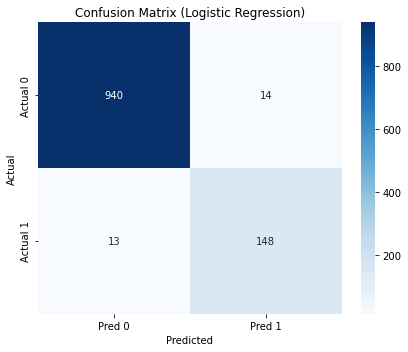

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix (Logistic Regression)", fontsize=12)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [31]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       1.00      0.86      0.92       161

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [32]:
print(confusion_matrix(y_test, rf.predict(X_test)))

[[954   0]
 [ 23 138]]


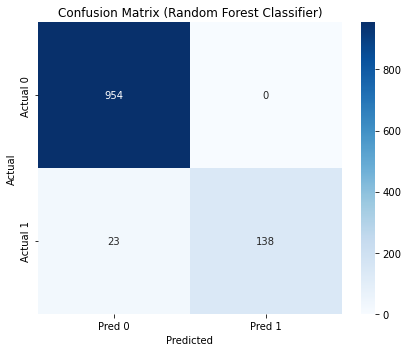

In [33]:
conf_matrix = confusion_matrix(y_test, rf.predict(X_test))

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix (Random Forest Classifier)", fontsize=12)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [34]:
from xgboost import XGBClassifier

In [35]:
model = XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       954
           1       0.91      0.92      0.91       161

    accuracy                           0.97      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.97      0.97      1115



In [37]:
print(confusion_matrix(y_test, model.predict(X_test)))

[[939  15]
 [ 13 148]]


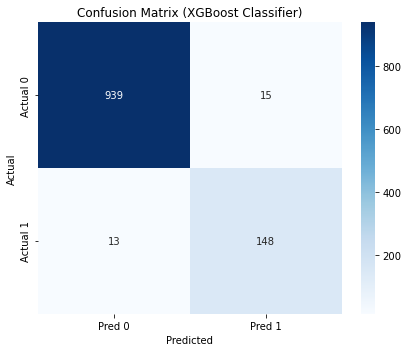

In [38]:
conf_matrix = confusion_matrix(y_test, model.predict(X_test))

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix (XGBoost Classifier)", fontsize=12)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

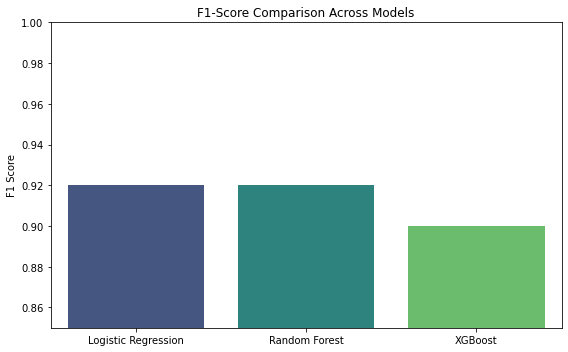

In [44]:
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
f1_scores = [0.92, 0.92, 0.90]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=f1_scores, palette="viridis")
plt.ylim(0.85, 1.0)
plt.title("F1-Score Comparison Across Models", fontsize=12)
plt.ylabel("F1 Score")
plt.tight_layout()
plt.show()

# Word cloud

In [40]:
from wordcloud import WordCloud

In [41]:
try:
    spam_messages = list(df.loc[df['label'] == 1, 'message'])
    print("Stored spam messages in a list")
except Exception as e:
    print(e)

Stored spam messages in a list


In [42]:
spam_text = " ".join(spam_messages)

In [43]:
try:
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(spam_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Spam Messages", fontsize=14)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(e)

Only supported for TrueType fonts
